In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sushmitha2024","key":"23200b4956e3977b99ecefa11f70fc54"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d awsaf49/brain-tumor-mri-and-ct-dataset --force


403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
import os
print(os.listdir())


['.config', 'kaggle (1).json', 'sample_data']


In [ ]:
!kaggle datasets list | head -n 10


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d murtozalikhon/brain-tumor-multimodal-image-ct-and-mri --force


Dataset URL: https://www.kaggle.com/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri
License(s): CC-BY-NC-SA-4.0
 98% 352M/361M [00:02<00:00, 139MB/s]
100% 361M/361M [00:02<00:00, 133MB/s]


In [ ]:
import zipfile

zip_path = "brain-tumor-multimodal-image-ct-and-mri.zip"
extract_path = "Brain_Tumor_Dataset"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
print(os.listdir("Brain_Tumor_Dataset/Dataset"))


['Brain Tumor MRI images', 'Brain Tumor CT scan Images']


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_path = "Brain_Tumor_Dataset/Dataset"
mri_train_path = os.path.join(dataset_path, "brain tumor MRI images", "MRI image source")
ct_train_path = os.path.join(dataset_path, "brain tumor Ct scan images", "Ct image source")


In [ ]:
import os
dataset_path = "Brain_Tumor_Dataset/Dataset"
print(os.listdir(dataset_path))


['Brain Tumor MRI images', 'Brain Tumor CT scan Images']


In [ ]:
mri_path = os.path.join(dataset_path, "Brain Tumor MRI images")
ct_path = os.path.join(dataset_path, "Brain Tumor CT scan Images")

print(os.listdir(mri_path))  # Should list ['MRI image source']
print(os.listdir(ct_path))    # Should list ['Ct image source']


['Healthy', 'MRI image source.txt', 'Tumor']
['Healthy', 'CT image source.txt', 'Tumor']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Corrected dataset paths
mri_source_path = os.path.join(dataset_path, "Brain Tumor MRI images")  # Contains Tumor & Healthy
ct_source_path = os.path.join(dataset_path, "Brain Tumor CT scan Images")  # Contains Tumor & Healthy

# Check if the directories exist
print("MRI Data:", os.listdir(mri_source_path))  # Should list ['Tumor', 'Healthy']
print("CT Data:", os.listdir(ct_source_path))    # Should list ['Tumor', 'Healthy']

# Image preprocessing with augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load MRI dataset
train_data_mri = datagen.flow_from_directory(
    mri_source_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data_mri = datagen.flow_from_directory(
    mri_source_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load CT Scan dataset
train_data_ct = datagen.flow_from_directory(
    ct_source_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data_ct = datagen.flow_from_directory(
    ct_source_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


MRI Data: ['Healthy', 'MRI image source.txt', 'Tumor']
CT Data: ['Healthy', 'CT image source.txt', 'Tumor']
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 3695 images belonging to 2 classes.
Found 923 images belonging to 2 classes.


In [ ]:
print(f"MRI Training Samples: {train_data_mri.samples}")
print(f"MRI Validation Samples: {val_data_mri.samples}")
print(f"CT Training Samples: {train_data_ct.samples}")
print(f"CT Validation Samples: {val_data_ct.samples}")


MRI Training Samples: 4000
MRI Validation Samples: 1000
CT Training Samples: 3695
CT Validation Samples: 923


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Tumor or Healthy
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the MRI dataset
history = model.fit(
    train_data_mri,
    validation_data=val_data_mri,
    epochs=10,  # You can increase epochs if needed
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.7023 - loss: 0.6122 - val_accuracy: 0.8350 - val_loss: 0.3763
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9058 - loss: 0.2430 - val_accuracy: 0.8520 - val_loss: 0.3989
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9335 - loss: 0.1821 - val_accuracy: 0.9170 - val_loss: 0.2701
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9682 - loss: 0.1040 - val_accuracy: 0.9050 - val_loss: 0.2393
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9821 - loss: 0.0557 - val_accuracy: 0.9150 - val_loss: 0.2535
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9826 - loss: 0.0534 - val_accuracy: 0.9270 - val_loss: 0.2366
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9887 - loss: 0.0402 - val_accuracy: 0.9390 - val_loss: 0.2013
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9923 - loss: 0.0181 - val_accu

In [ ]:
# Evaluate model on validation set
loss, accuracy = model.evaluate(val_data_mri)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 450ms/step - accuracy: 0.9558 - loss: 0.2758
Validation Accuracy: 96.30%


In [ ]:
model.save("brain_tumor_mri_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("brain_tumor_mri_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import os

# Pick an MRI image from the dataset for testing
sample_mri_image = os.path.join(mri_source_path, "Tumor")
sample_image_name = os.listdir(sample_mri_image)[0]  # First available image
test_image_path = os.path.join(sample_mri_image, sample_image_name)

print(f"Using image for testing: {test_image_path}")


Using image for testing: Brain_Tumor_Dataset/Dataset/Brain Tumor MRI images/Tumor/meningioma (263).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


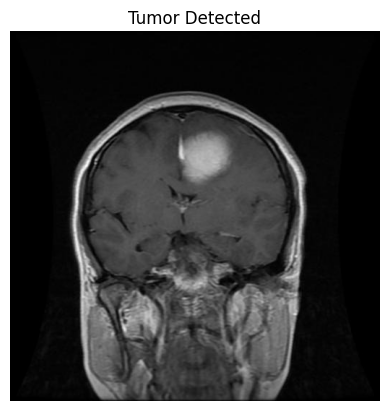

Prediction: Tumor Detected


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)[0][0]

    return "Tumor Detected" if prediction > 0.5 else "No Tumor"

# Run prediction
result = predict_image(test_image_path, model)

# Display image and result
img = image.load_img(test_image_path)
plt.imshow(img)
plt.axis("off")
plt.title(result)
plt.show()

print("Prediction:", result)


In [ ]:
import os

# Path to MRI Tumor images
mri_tumor_path = "Brain_Tumor_Dataset/Dataset/Brain Tumor MRI images/Tumor"

# List available images
sample_images = os.listdir(mri_tumor_path)
print(sample_images[:5])  # Show the first 5 images


['meningioma (263).jpg', 'meningioma (726).jpg', 'meningioma (916).jpg', 'tumor (306).jpg', 'meningioma (818).jpg']


In [ ]:
import os

# Define the path to the MRI tumor image
test_image_name = "tumor (199).jpg"  # Change this to any image from your dataset
test_image_path = os.path.join("Brain_Tumor_Dataset/Dataset/Brain Tumor MRI images/Tumor", test_image_name)

print(f"Using image: {test_image_path}")


Using image: Brain_Tumor_Dataset/Dataset/Brain Tumor MRI images/Tumor/tumor (199).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


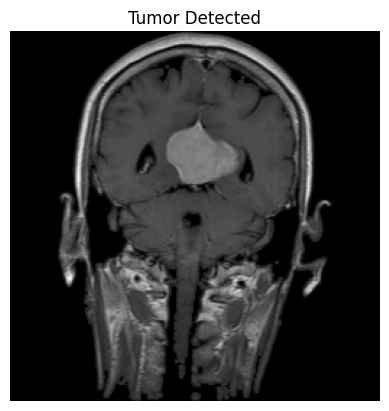

Prediction: Tumor Detected


In [ ]:
result = predict_image(test_image_path, model)

# Display the image along with the prediction
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img = image.load_img(test_image_path)
plt.imshow(img)
plt.axis("off")
plt.title(result)
plt.show()

print("Prediction:", result)


In [ ]:
import os

# Define paths
mri_source_path = "Brain_Tumor_Dataset/Dataset/Brain Tumor MRI images"
ct_source_path = "Brain_Tumor_Dataset/Dataset/Brain Tumor CT scan Images"

# List subfolders (Tumor, Healthy)
print("MRI Dataset Folders:", os.listdir(mri_source_path))
print("CT Dataset Folders:", os.listdir(ct_source_path))

# List images in the Tumor and Healthy folders
mri_tumor_images = os.listdir(os.path.join(mri_source_path, "Tumor"))
mri_healthy_images = os.listdir(os.path.join(mri_source_path, "Healthy"))

ct_tumor_images = os.listdir(os.path.join(ct_source_path, "Tumor"))
ct_healthy_images = os.listdir(os.path.join(ct_source_path, "Healthy"))

# Display a few images
print("\nSample MRI Tumor Images:", mri_tumor_images[:5])
print("Sample MRI Healthy Images:", mri_healthy_images[:5])

print("\nSample CT Tumor Images:", ct_tumor_images[:5])
print("Sample CT Healthy Images:", ct_healthy_images[:5])


MRI Dataset Folders: ['Healthy', 'MRI image source.txt', 'Tumor']
CT Dataset Folders: ['Healthy', 'CT image source.txt', 'Tumor']

Sample MRI Tumor Images: ['meningioma (263).jpg', 'meningioma (726).jpg', 'meningioma (916).jpg', 'tumor (306).jpg', 'meningioma (818).jpg']
Sample MRI Healthy Images: ['mri_healthy (1002).jpg', 'mri_healthy (919).jpg', 'mri_healthy (1949).jpg', 'mri_healthy (34).jpg', 'mri_healthy (1806).jpg']

Sample CT Tumor Images: ['ct_tumor (2083).jpg', 'ct_tumor (1494).jpg', 'ct_tumor (254).jpg', 'ct_tumor (42).jpg', 'ct_tumor (2041).jpg']
Sample CT Healthy Images: ['ct_healthy (507).jpg', 'ct_healthy (320).jpg', 'ct_healthy (1056).jpg', 'ct_healthy (558).jpg', 'ct_healthy (305).png']


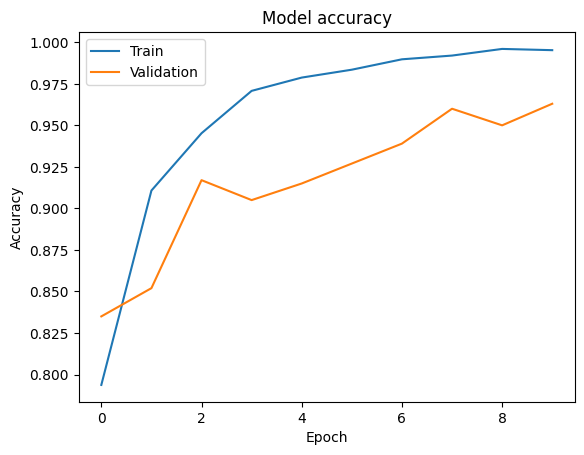

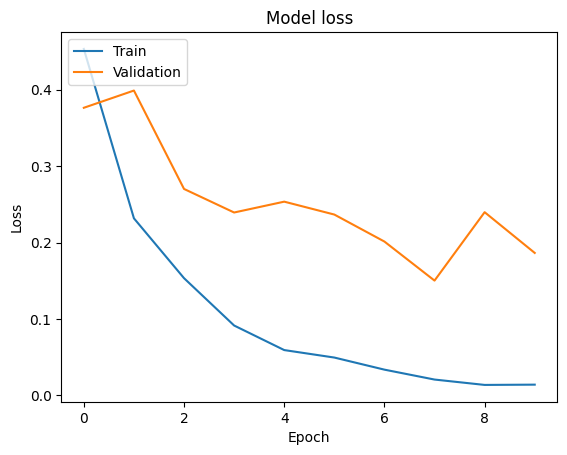

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()